<a href="https://colab.research.google.com/github/TAUforPython/BioMedAI/blob/main/GNN%20brain%20connectome%20Graph%20Convolution%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
class GCNConv(nn.Module):
    def __init__(self, A, in_channels, out_channels):
        super(GCNConv, self).__init__()
        self.A_hat = A+torch.eye(A.size(0))
        self.D     = torch.diag(torch.sum(A,1))
        self.D     = self.D.inverse().sqrt()
        self.A_hat = torch.mm(torch.mm(self.D, self.A_hat), self.D)
        self.W     = nn.Parameter(torch.rand(in_channels,out_channels, requires_grad=True))

    def forward(self, X):
        out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))
        return out

In [3]:
class Net(torch.nn.Module):
    def __init__(self,A, nfeat, nhid, nout):
        super(Net, self).__init__()
        self.conv1 = GCNConv(A,nfeat, nhid)
        self.conv2 = GCNConv(A,nhid, nout)

    def forward(self,X):
        H  = self.conv1(X)
        H2 = self.conv2(H)
        return H2

In [4]:
# 'A' is the adjacency matrix, it contains 1 at a position (i,j) if there is a edge between the node i and node j.
A=torch.Tensor([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
                [1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                [1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1],
                [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],
                [0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0]
                ])

In [5]:
#In this example we have the label for admin(node 1)
#and instructor(node 34) so only these two contain
#the class label(0 and 1) all other are set to -1,
#which means that the predicted value of these nodes
#will be ignores in the computation of loss function.

target=torch.tensor([0,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,1])

In [6]:
# X - is a feature matrix
X=torch.eye(A.size(0))

# Make network

In [7]:
T=Net(A,X.size(0), 10, 2)

In [8]:
criterion = torch.nn.CrossEntropyLoss(ignore_index=-1)
optimizer = optim.SGD(T.parameters(), lr=0.01, momentum=0.9)
loss=criterion(T(X),target)

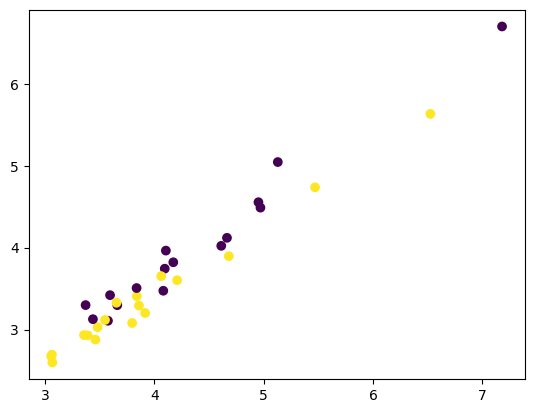

In [9]:
l=(T(X))
plt.scatter(l.detach().numpy()[:,0],l.detach().numpy()[:,1],c=[0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0 ,1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])


In [10]:
for i in range(200):
    optimizer.zero_grad()
    loss=criterion(T(X), target)
    loss.backward()
    optimizer.step()
    l=(T(X));
    if i%20==0:
      print("Cross Entropy Loss: =", loss.item())

Cross Entropy Loss: = 0.8582720756530762
Cross Entropy Loss: = 0.6871018409729004
Cross Entropy Loss: = 0.5306019186973572
Cross Entropy Loss: = 0.37035712599754333
Cross Entropy Loss: = 0.21989531815052032
Cross Entropy Loss: = 0.12315469235181808
Cross Entropy Loss: = 0.07458031177520752
Cross Entropy Loss: = 0.050626203417778015
Cross Entropy Loss: = 0.037302806973457336
Cross Entropy Loss: = 0.02908904477953911


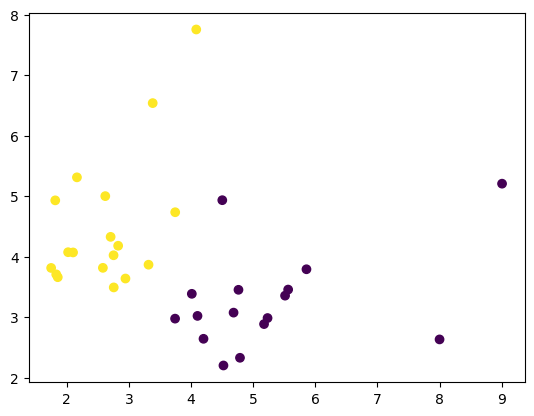

In [11]:
plt.scatter(l.detach().numpy()[:,0],l.detach().numpy()[:,1],c=[0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0 ,1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])


# Graph visualization

In [16]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# convert Tensor adjacent matrix to simple numpy array
#Anpmat = A.numpy()
#G = nx.from_numpy_array(Anpmat)

#https://github.com/3BIM20162017/CElegansTP

file_link = 'https://github.com/TAUforPython/BioMedAI/raw/refs/heads/main/test_datasets/Connectome.csv'

connectom_df = pd.read_csv(file_link,decimal='.', sep=';', index_col='Number')
connectom_df.head()

,Neuron,Target,Number of Connections,Neurotransmitter
Number,,,,
0,ADAL,AIBL,1.0,exc
1,ADAL,AIBR,2.0,exc
2,ADAL,AVAR,2.0,exc
3,ADAL,AVBL,4.0,exc
4,ADAL,AVBR,7.0,exc


{(0,
  2,
  'A'): Text(0.3838609781193789, 0.27544321356832757, "{'weight': 3, 'color': 'red'}"),
 (0,
  2,
  'D'): Text(0.3838609781193789, 0.27544321356832757, "{'weight': 6, 'color': 'blue'}"),
 (2,
  1,
  'B'): Text(-0.45615729564276286, 0.23589066701680617, "{'weight': 4, 'color': 'blue'}"),
 (2,
  3,
  'C'): Text(0.14004045798510223, -0.48866753083399206, "{'weight': 5, 'color': 'blue'}")}

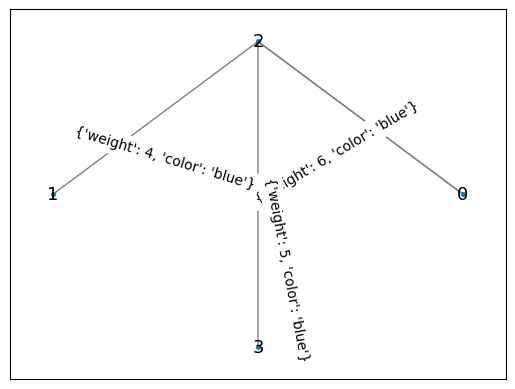

In [70]:
edges = pd.DataFrame(
    {
        "source": [0, 1, 2, 0],
        "target": [2, 2, 3, 2],
        "my_edge_key": ["A", "B", "C", "D"],
        "weight": [3, 4, 5, 6],
        "color": ["red", "blue", "blue", "blue"],
    }
)
G = nx.from_pandas_edgelist(
    edges,
    edge_key="my_edge_key",
    edge_attr=["weight", "color"],
    create_using=nx.MultiGraph(),
)
nx.draw_networkx(G, pos=nx.circular_layout(G),
                 node_size=7,
                 font_size = 13,
                 edge_color ='grey')

nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G),node_size=7, rotate=True)

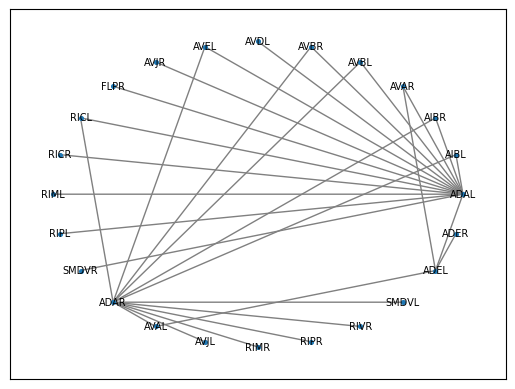

In [89]:
connectom_df = connectom_df.head(30)
edges = pd.DataFrame(
    {
        "source": connectom_df['Neuron'],
        "target": connectom_df['Target'],
        "my_edge_key": connectom_df['Neurotransmitter'],
        "weight": connectom_df['Number of Connections'],
        #"color": ["red", "blue", "blue", "blue"],
    }
)
G = nx.from_pandas_edgelist(
    edges,
    edge_key="my_edge_key",
    edge_attr=["weight"],
    create_using=nx.MultiGraph(),
)
nx.draw_networkx(G, pos=nx.circular_layout(G), node_size=7, font_size = 7,edge_color ='grey')
#nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G), node_size=7, font_size = 7)

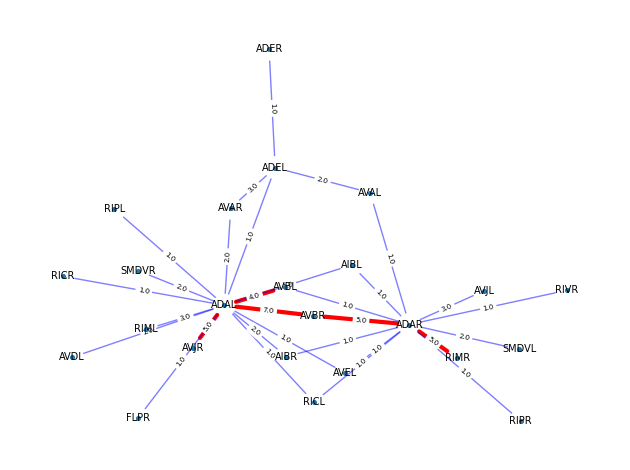

In [99]:

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 3]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 3]

pos = nx.spring_layout(G, seed=13)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=7)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3, edge_color="r")
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="solid"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=7, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=5)

ax = plt.gca()
#ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

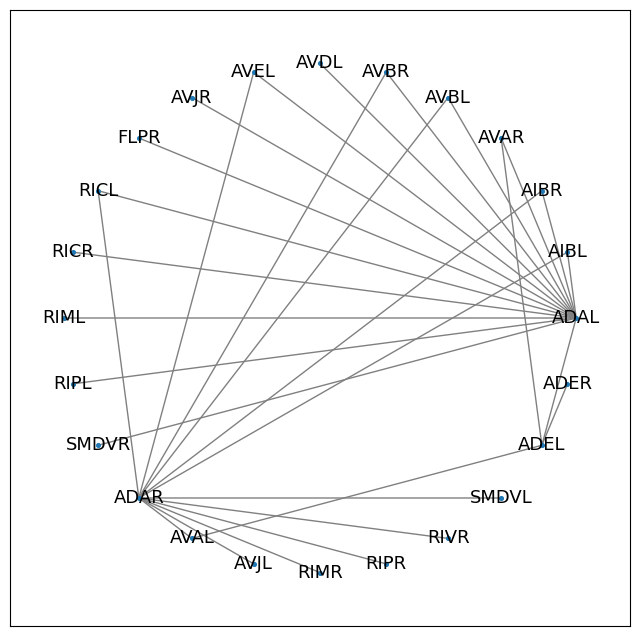

In [94]:
plt.figure(figsize=(8, 8))

nx.draw_networkx(G, pos=nx.circular_layout(G), node_size=7, font_size = 13,edge_color ='grey')

# Brain conectome

In [21]:
import os
import sys
import math
import time
import datetime

import numpy as np
import pandas as pd
import scipy.io

import nibabel as nib
from scipy import sparse
from scipy.stats import spearmanr
from sklearn import preprocessing, metrics,manifold
from sklearn.model_selection import cross_val_score, train_test_split,ShuffleSplit
import itertools


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

#from torch_scatter import scatter_add
##from torch_geometric.utils import add_self_loops
##from utils import add_self_loops

#from utils import *

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')

(array([    0.,     0.,     0.,     0.,     0., 85327.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

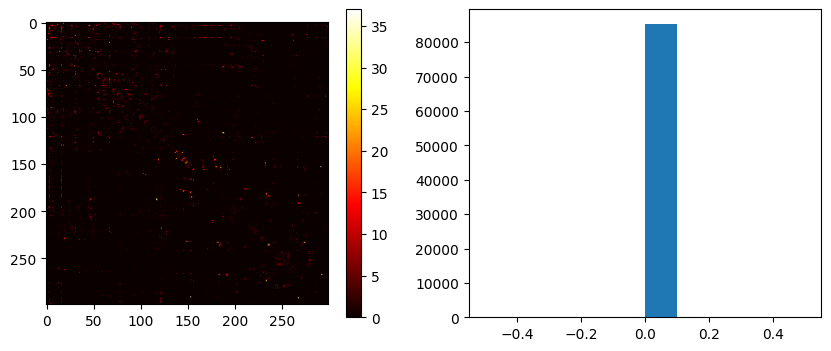

In [22]:
##step1: load brain connectome

#adjacent_mat_file = "MMP_DiffusionConnectivity_HCP_avg56.mat"
#mat = scipy.io.loadmat(adjacent_mat_file)
#corr_matrix_z = mat['SC_avg56']
A = nx.adjacency_matrix(G)
A = A.toarray()
corr_matrix_z = A
num_nodes = corr_matrix_z.shape[0]

fig=plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.imshow(corr_matrix_z, cmap="hot")#,vmin=0.1, vmax=1)
plt.colorbar()

fig.add_subplot(122)
plt.hist(corr_matrix_z[corr_matrix_z<1])

(array([1998.,    0.,    0.,    0.,    0.,  968.,    0.,    0.,    0.,
         656.]),
 array([7.24121663e-186, 1.00000000e-001, 2.00000000e-001, 3.00000000e-001,
        4.00000000e-001, 5.00000000e-001, 6.00000000e-001, 7.00000000e-001,
        8.00000000e-001, 9.00000000e-001, 1.00000000e+000]),
 <BarContainer object of 10 artists>)

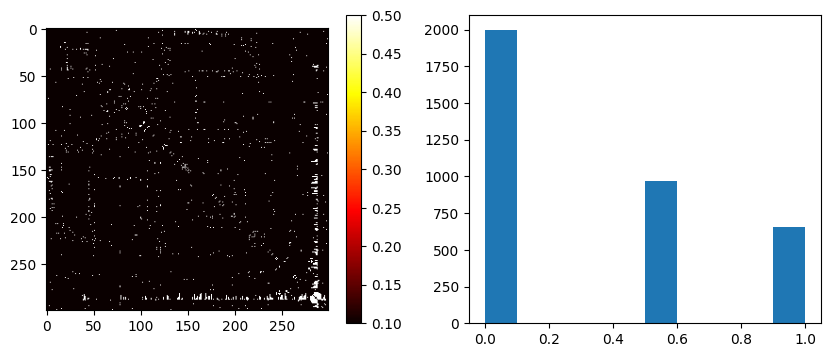

In [23]:
## Step2: build a k-NN graph.
## find a connectivity strangh

def build_adjacency(dist, idx):
    """Return the adjacency matrix of a kNN graph."""
    M, k = dist.shape
    assert M, k == idx.shape
    assert dist.min() >= 0

    # Weights.
    sigma2 = np.mean(dist[:, -1])**2
    dist = np.exp(- dist**2 / sigma2)

    # Weight matrix.
    I = np.arange(0, M).repeat(k)
    J = idx.reshape(M*k)
    V = dist.reshape(M*k)
    W = sparse.coo_matrix((V, (I, J)), shape=(M, M))

    # No self-connections.
    W.setdiag(0)

    # Non-directed graph.
    bigger = W.T > W
    W = W - W.multiply(bigger) + W.T.multiply(bigger)
    return W

Nneighbours=8
idx = np.argsort(-corr_matrix_z)[:, 1:Nneighbours + 1]
dist = np.array([corr_matrix_z[i, idx[i]] for i in range(corr_matrix_z.shape[0])])
dist[dist < 0.1] = 0
adj_mat_sp = build_adjacency(dist, idx)

fig=plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.imshow(adj_mat_sp.todense(), cmap="hot",vmin=0.1, vmax=0.5);
plt.colorbar()

fig.add_subplot(122)
plt.hist(adj_mat_sp.data)

In [24]:
!pip install -q torch-scatter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [25]:
from torch_scatter import scatter_add

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [26]:
##use the old add_self_loop function from pytorch-geometric
def maybe_num_nodes(index, num_nodes=None):
    return index.max().item() + 1 if num_nodes is None else num_nodes

def add_self_loops(edge_index, edge_weight=None, fill_value=1, num_nodes=None):
    r"""Adds a self-loop :math:`(i,i) \in \mathcal{E}` to every node
    :math:`i \in \mathcal{V}` in the graph given by :attr:`edge_index`.
    In case the graph is weighted, all existent self-loops will be removed and
    replaced by weights denoted by :obj:`fill_value`.

    Args:
        edge_index (LongTensor): The edge indices.
        edge_weight (Tensor, optional): One-dimensional edge weights.
            (default: :obj:`None`)
        fill_value (int, optional): If :obj:`edge_weight` is not :obj:`None`,
            will add self-loops with edge weights of :obj:`fill_value` to the
            graph. (default: :obj:`1`)
        num_nodes (int, optional): The number of nodes, *i.e.*
            :obj:`max_val + 1` of :attr:`edge_index`. (default: :obj:`None`)

    :rtype: (:class:`LongTensor`, :class:`Tensor`)
    """
    num_nodes = maybe_num_nodes(edge_index, num_nodes)

    loop_index = torch.arange(0,
                              num_nodes,
                              dtype=torch.long,
                              device=edge_index.device)
    loop_index = loop_index.unsqueeze(0).repeat(2, 1)

    if edge_weight is not None:
        assert edge_weight.numel() == edge_index.size(1)
        loop_weight = edge_weight.new_full((num_nodes, ), fill_value)
        edge_weight = torch.cat([edge_weight, loop_weight], dim=0)

    edge_index = torch.cat([edge_index, loop_index], dim=1)

    return edge_index, edge_weight

Converting from scipy sparse matrix:
[  2   3   4 ...  70 117 132]
[9.64143388e-02 9.64143388e-02 8.64104981e-05 ... 5.57231177e-01
 5.17986762e-03 5.57231177e-01]
Converting to torch sparse tensor:
tensor([[  0,   0,   0,  ..., 298, 298, 298],
        [  2,   3,   4,  ...,  70, 117, 132]])
tensor([9.6414e-02, 9.6414e-02, 8.6410e-05,  ..., 5.5723e-01, 5.1799e-03,
        5.5723e-01])

Calculation time for Laplacian matrix:0.07431149482727051s


<ipython-input-27-463e0aaa8fe2>:9: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:644.)
  return torch.sparse.FloatTensor(indices, values, shape)


(array([ 299.,    0.,    0.,    0.,    0.,    0., 3066.,  494.,   58.,
           4.]),
 array([-1.        , -0.83491004, -0.66982001, -0.50472999, -0.33964002,
        -0.17455006, -0.00946003,  0.15562999,  0.32071996,  0.48580992,
         0.65089989]),
 <BarContainer object of 10 artists>)

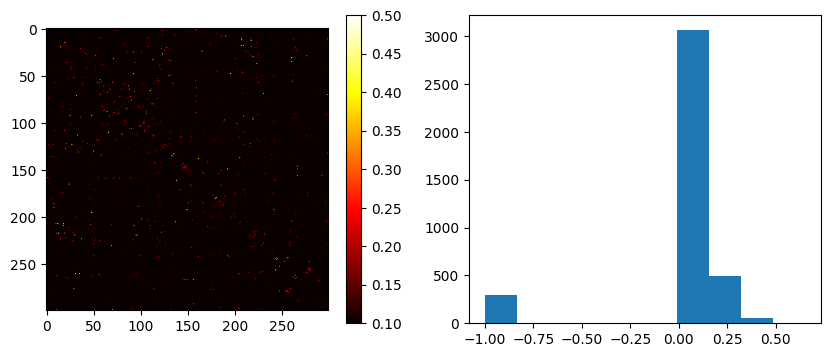

In [27]:
###Step 3: Laplacian Matrix: L=I-D(-1/2)AD(-1/2)
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

t0 = time.time()
adj_mat = sparse_mx_to_torch_sparse_tensor(adj_mat_sp)
print("Converting from scipy sparse matrix:")
print(adj_mat_sp.indices)
print(adj_mat_sp.data)
print("Converting to torch sparse tensor:")
print(adj_mat._indices())
print(adj_mat._values())

edge_index = adj_mat._indices()
edge_weight = adj_mat._values()
row, col = edge_index

#degree-matrix
deg = scatter_add(edge_weight, row, dim=0, dim_size=num_nodes)

# Compute normalized and rescaled Laplacian.
deg = deg.pow(-0.5)
deg[torch.isinf(deg)] = 0
lap = deg[row] * edge_weight * deg[col]

###Rescale the Laplacian eigenvalues in [-1, 1]
##rescale: 2L/lmax-I; lmax=1.0
fill_value = 1  ##-0.5
edge_index, lap = add_self_loops(edge_index, -lap, fill_value, num_nodes)

laplacian_matrix = sparse.coo_matrix((lap.numpy(),edge_index),shape=(num_nodes,num_nodes))
print("\nCalculation time for Laplacian matrix:{}s".format(time.time()-t0))
fig=plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.imshow(-laplacian_matrix.todense(), cmap="hot",vmin=0.1, vmax=0.5);
plt.colorbar()

fig.add_subplot(122)
plt.hist(-laplacian_matrix.data)

Text(0.5, 1.0, '2nd EigenVectors')

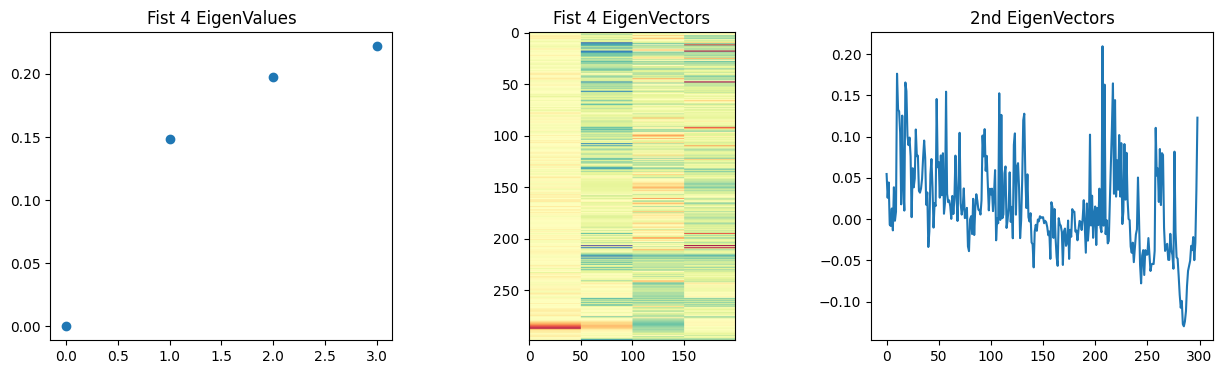

In [28]:
###Step 4: Spectral decomposition
from scipy.linalg import eigh
w, v = eigh(laplacian_matrix.todense()) # w = eigenvalues, v = eigenvectors

K_eigbasis = min(4,num_nodes)
fig=plt.figure(figsize=(15,4))
fig.add_subplot(131)
plt.scatter(range(K_eigbasis),w[:K_eigbasis])
plt.title("Fist {} EigenValues".format(K_eigbasis))

fig.add_subplot(132)
plt.imshow(np.repeat(v[:,:K_eigbasis],50,axis=1), cmap="Spectral")
plt.title("Fist {} EigenVectors".format(K_eigbasis))

fig.add_subplot(133)
plt.plot(v[:,1])
plt.title("2nd EigenVectors")

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


[[1.         0.16458489]
 [0.16458489 1.        ]]


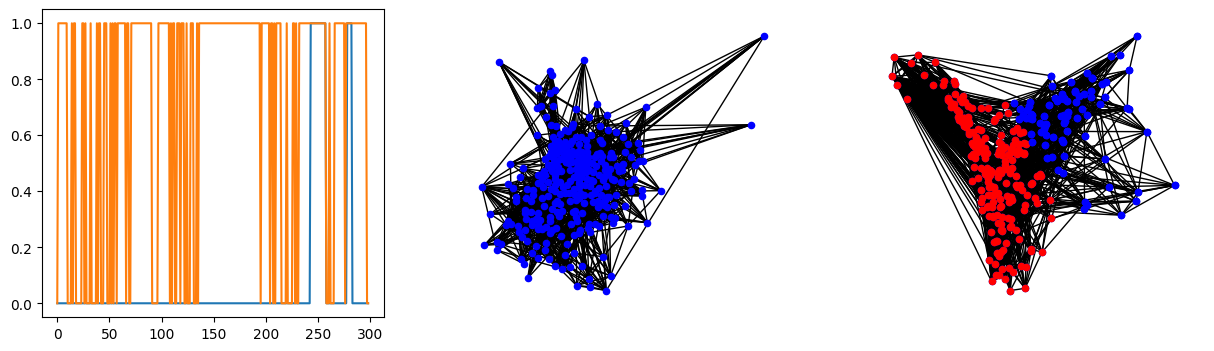

In [29]:
##Example #1: mapping 2nd and 3rd eigvectors and spectral clustering

##spectral clustering from sklearn
from sklearn import cluster
import scipy.sparse
sp_clustering = cluster.SpectralClustering(n_clusters=2,eigen_solver='arpack',affinity='precomputed',
                                   assign_labels="discretize",random_state=1234).fit(corr_matrix_z)
sp_clustering.labels_

##spectral clustering: applying k-means to first k eigenvectors
sk_clustering = cluster.KMeans(n_clusters=2, random_state=1234).fit(v[:,:K_eigbasis])
sk_clustering.labels_
clusters = np.array([sp_clustering.labels_,sk_clustering.labels_]).transpose()
print(np.corrcoef(sp_clustering.labels_,sk_clustering.labels_))

fig=plt.figure(figsize=(15,4))
fig.add_subplot(131)
plt.plot(clusters)

##visualize the graph architecture
import networkx as nx
graph = nx.from_scipy_sparse_array(adj_mat_sp, parallel_edges=False, create_using=None, edge_attribute='weight')
pos = nx.spring_layout(graph)
fig.add_subplot(132)
nx.draw(graph, pos, node_size=20, node_color='b')

pos = {i : (v[i,1], v[i,2]) for i in range(num_nodes)}
fig.add_subplot(133)
# set of nodes
nx.draw(graph, pos, node_size=20, node_color='b')
nx.draw_networkx_nodes(graph, pos,
                       nodelist=list(np.where(sk_clustering.labels_==1)[0]),
                       node_color='r',node_size=20)
nx.draw_networkx_nodes(graph, pos,
                       nodelist=list(np.where(sk_clustering.labels_==0)[0]),
                       node_color='b',node_size=20,)
plt.show()